# Part 4 
## 3.11 Homework
### Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p = 10^{–3}$.
#### What is the expected number of links, $\langle L \rangle$?

Remember the formula (Box 3.11 in book): $$ \langle L \rangle = \frac{pN \cdot (N-1)}{2}$$ 
So if $N = 3000$ and $p = 10^{–3}$, we can then calculate the expected number of links as:


In [3]:
N = 3000
p = 10**-3

L = (N * (N - 1) / 2) * p
print(L)

4498.5


So the expected number of links is:
 $$
 \langle L \rangle = \frac{10^{-3} \cdot 3000 \cdot (3000-1)}{2} = 4498.5
 $$ 

#### In which regime is the network?

According to chapter 3.6 there are 4 distinct regimes:

Subcritical Regime: where $0 < \langle k \rangle < 1$
   
    - In this regime, most nodes are in small, isolated components, and the network consists mainly of disconnected subgraphs with no giant component.

Critical Point: where $ \langle k \rangle = 1 $
     
     - At this point, a giant component just starts to emerge, and the network undergoes a phase transition where a single large connected component appears, but the network is still mostly fragmented.

Supercritical Regime: where $ \langle k \rangle > 1$
    
    - In this regime, a giant component exists, and the majority of nodes are connected within it, but the network is not fully connected. Some small components may still be present.

Connected Regime: where $ \langle k \rangle > ln(N)$
    
    - In this regime, almost all nodes belong to a single giant component, and the network is fully connected with high probability. The network contains few if any isolated nodes or disconnected components.

So to find out what regime the network is in, we need to calculate $\langle k \rangle$:

$$
\langle k \rangle = p(N-1)
$$

In [4]:
k = p * (N - 1)
print(k)

2.999


$$
\langle k \rangle = 10^{-3}(3000-1) = 2.999
$$

Since $\langle k \rangle = 2.999$ the network must be in the supercritical regimes since $2.999 > 1$. It cannot be in subcritical or critical point, nor in connected regime since $ln(3000) = 8,0063675677$

This means a giant component does exist and most nodes are connected within but the network isn't fully connected.

#### Calculate the probability $p_c$ so that the network is at the critical point.

The critical point occurs when $\langle k \rangle = 1$, So we will use the same formula to calculate $\langle k \rangle$ as above but solve for $p_c$:

$$
p_c(N-1) = 1 <=> p_c = \frac{1}{N-1}
$$

for $N = 3000$:

In [5]:
p_c = 1 / (N - 1)
print(p_c)

0.00033344448149383126


$$
p_c = \frac{1}{3000-1} \approx 0.000333
$$

So when $p_c \approx 0.000333$ then the network is at the critical point.

####  Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N_{cr}$ so that the network has only one component.

If the network only should have one component, then it should be a fully connected network i.e. a connected regime - where $ \langle k \rangle > ln(N)$

Again we'll use the same formula:
$$
\langle k \rangle = p(N-1)
$$

We want to find the critical value where the network goes from supercritical regime to fully connected, so we have to calculate the value where $\langle k \rangle = ln(n)$

$$
p(N-1) = ln(n)
$$

$$
10^{-3} \cdot (N-1) = ln(n)
$$

Calculations in the code:

In [13]:
import numpy as np
from scipy.optimize import fsolve

def equation(N):
    return 10**-3 * (N-1) - np.log(N)

N_cr = fsolve(equation, 1000)
print(f"Critical N (N_cr) for p = 10^-3: {N_cr[0]}")

Critical N (N_cr) for p = 10^-3: 9119.129644833787


The result 9119.129644833787 is the threshold for the network to be fully connected, so this means that n should be slightly above 9119.129644833787 to be fully connected i.e N = 9120


In [16]:
print(10**-3 * (9120-1) > np.log(9120))

True


So if N = 9120 the network only has one component.

#### For the network in (d), calculate the average degree $ \langle k_{cr} \rangle $ and the average distance between two randomly chosen nodes $\langle d \rangle$.

The network in (d) is the one above where N = 9120 and $p = 10_{-3}$. Since all nodes have the same degree in a fully connected network the average degree is N-1. We already know it from above because we calculated the threshold where $ \langle k \rangle = ln(n)$ which was $\approx 9119$ 

And if we do get the same when we just take N - 1:

$$ \langle k_cr \rangle  =  9120 - 1 = 9119$$

To calculate the average degree we'll use the formula described in the book in section 3.8 (fomula 3.19):

$$
\langle d \rangle = \frac{ln(N)}{ln \langle k \rangle}
$$

In [17]:
print(np.log(9120)/np.log(9119))

1.0000120260744207


$$
\langle d \rangle = \frac{ln(9120)}{ln \langle 9119 \rangle} = 1
$$
The average distance is 1, this is right since it is a fully connected network and all nodes are directly connected so it will always be 1.


#### Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

The degree distribution with a poisson distribution is defined in the book (box 3.11) as:

$$
p_k = e^{-\langle k \rangle} \cdot \frac{\langle k \rangle ^k}{k!}
$$

where;

- $p_k$ is the probability of a node having exactly k connections.
- $\langle k \rangle$ is the average degree of the network, which is the expected number of links per node.
- $k$ is the degree of a node, meaning the number of connections a specific node has.

To calculate the degree distribution for the network we'll calculate $p_k$ over a range of values for k, and plot it.


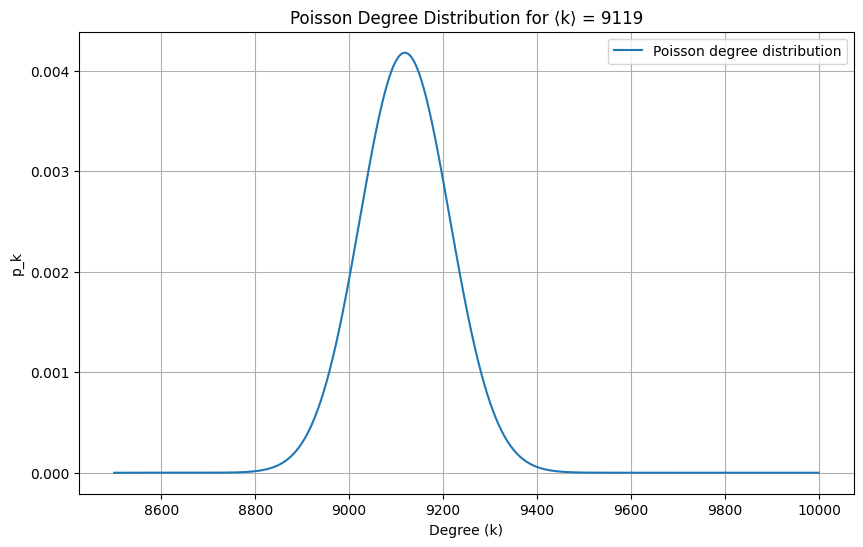

In [26]:
import math
import matplotlib.pyplot as plt

# Given parameters
average_degree = 9119 
k_values = range(8500, 10000)  # Range of k values to better visualize the peak

# Function to calculate Poisson degree distribution using log to prevent overflow
def poisson_degree_distribution_log(k, average_degree):
    log_p_k = (-average_degree + k * np.log(average_degree) - sum(np.log(np.arange(1, k+1))))
    return np.exp(log_p_k)

# Calculate p_k for each k in the range
degree_distribution = [poisson_degree_distribution_log(k, average_degree) for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, degree_distribution, label='Poisson degree distribution')

# Switch to a linear scale to make the smaller values more visible
plt.yscale('linear')

plt.xlabel('k')
plt.ylabel('p_k')
plt.title('Poisson Degree Distribution for ⟨k⟩ = 9119')
plt.legend()
plt.grid(True)
plt.show()


## Paths (Exercises in week2.ipynb)

### Plot a random network with 200 nodes and an average degree of 1.5. 

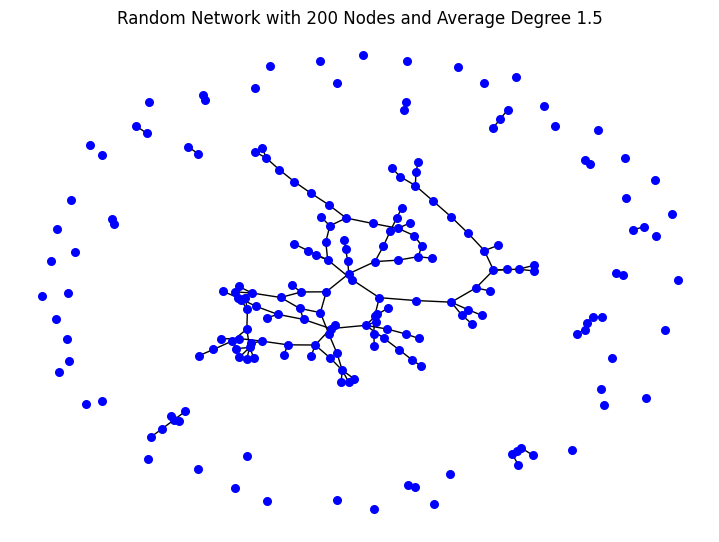

In [38]:
import networkx as nx

# First we calculate p for the given average degree and number of nodes
N = 200  
average_degree = 1.5  

p = average_degree / (N - 1)

# Create graph 
G = nx.gnp_random_graph(N, p)

plt.figure(figsize=(7, 5))
nx.draw(G, node_size=30, node_color='blue', with_labels=False)
plt.title(f"Random Network with {N} Nodes and Average Degree {average_degree}")
plt.show()


### Extract the Giant Connected Component.

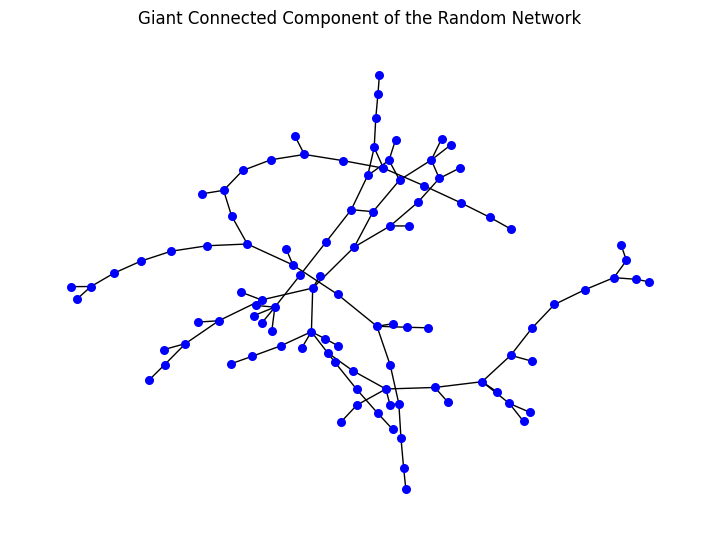

In [46]:
# Extract the Giant Connected Component (GCC)
gcc = max(nx.connected_components(G), key=len) 
GCC = G.subgraph(gcc)

plt.figure(figsize=(7, 5))
nx.draw(GCC, node_size=30, node_color='blue', with_labels=False)
plt.title("Giant Connected Component of the Random Network")
plt.show()

### Choose a node at random from the GCC.

In [51]:
import random

random_node = random.choice(list(GCC.nodes()))

print(f"Random node chosen: {random_node}")

Random node chosen: 74


### Find all nodes that are precisely 2 steps away from that node.

In [52]:
# Find all nodes that are exactly 2 steps away from the random node
shortest_path_lengths = nx.single_source_shortest_path_length(GCC, random_node)

# Get nodes that are exactly 2 steps away
nodes_two_steps_away = [node for node, length in shortest_path_lengths.items() if length == 2]

print(f"Nodes exactly 2 steps away from {random_node}: {nodes_two_steps_away}")

Nodes exactly 2 steps away from 74: [70, 177, 25, 29, 172]


### Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2").

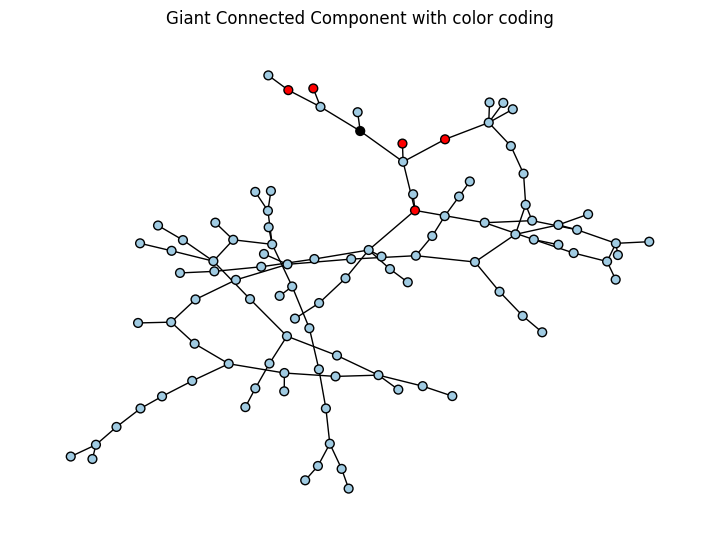

In [61]:
# Assign colors to nodes
node_colors = []
for node in GCC.nodes():
    if node == random_node:
        node_colors.append("#000000")  # Starting node is black
    elif node in nodes_two_steps_away:
        node_colors.append("#ff0000")  # Nodes 2 steps away are red
    else:
        node_colors.append("#A0CBE2")  # All other nodes are blue


plt.figure(figsize=(7, 5))
# Also added border to nodes to better distinguish them to make it also more similar to the picture in the assignment
nx.draw(GCC, node_color=node_colors, with_labels=False, node_size=40, edgecolors='black', linewidths=1)
plt.title(f"Giant Connected Component with color coding")
plt.show()